In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


In [ ]:
!mv "kaggle (1).json" kaggle.json

In [ ]:
!mv "kaggle (1) (1).json" kaggle.json

mv: cannot stat 'kaggle (1) (1).json': No such file or directory


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
# Core Python libraries
import os
import numpy as np
import random
import io
from PIL import Image, ImageEnhance

# Image processing
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from tqdm import tqdm  # progress bar

# Deep learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import VGG16

In [ ]:
!unzip brain-tumor-mri-dataset.zip

Archive:  brain-tumor-mri-dataset.zip
replace Testing/glioma/Te-glTr_0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

brain-tumor-mri-dataset.zip  kaggle.json  sample_data  Testing	Training


In [ ]:
train_dir = './Training/'
test_dir = './Testing/'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    label_folder = os.path.join(train_dir, label)
    for img_file in os.listdir(label_folder):
        img_path = os.path.join(label_folder, img_file)
        train_paths.append(img_path)
        train_labels.append(label)

0 5301
1 68
2 5594
3 2358
4 3551
5 459
6 5246
7 4011
8 5200
9 3985


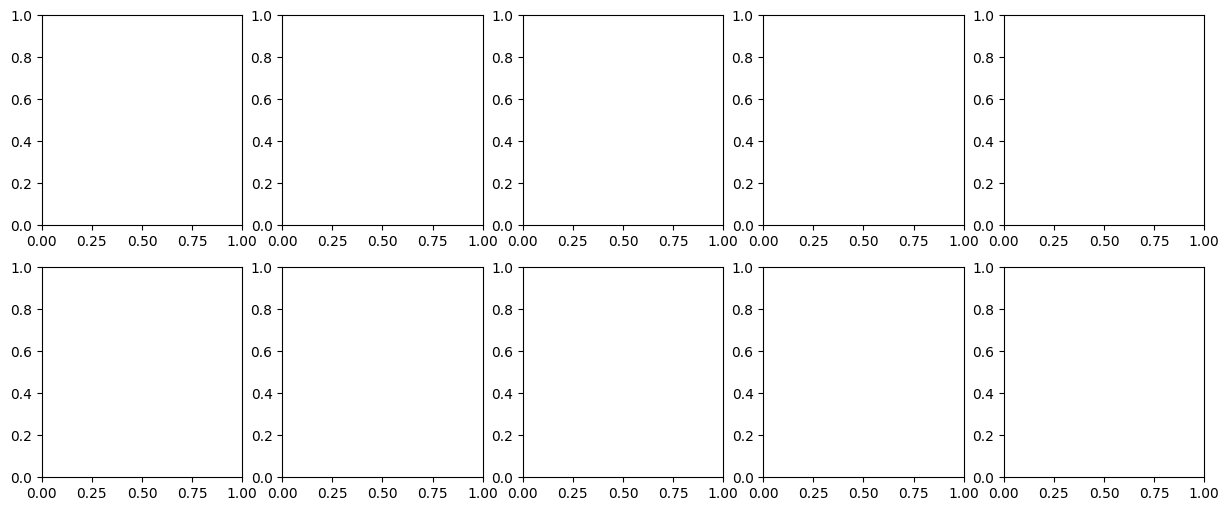

In [ ]:
import random
import matplotlib.pyplot as plt
#selecting random indices for 10 ranges
random_indices=random.sample(range(len(train_paths)),10)
random_indices
#creating a display of image in 2 rows
fig, axes = plt.subplots(2,5, figsize=(15,6))
axes = axes.ravel()
#Loop through the random indices and display images
for i, index in enumerate(random_indices):
 print(i,index)

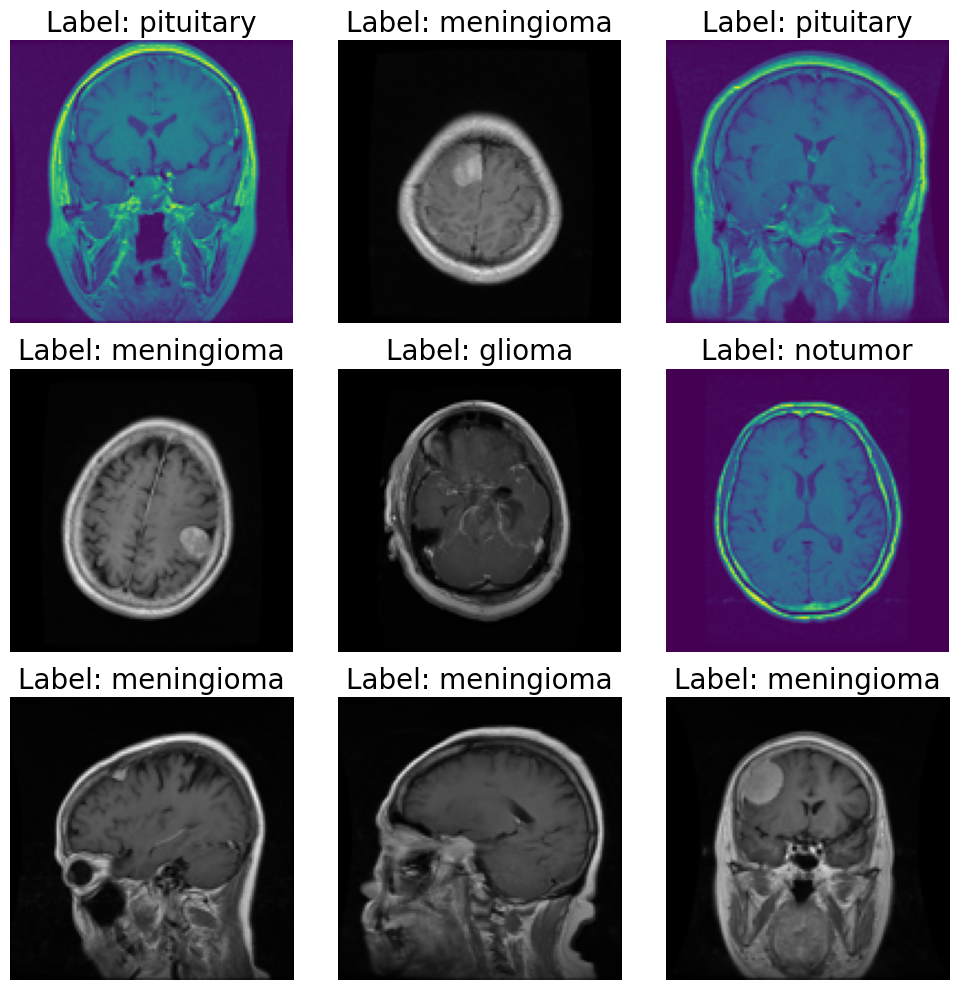

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# Randomly pick 9 images to visualize
random_indices = random.sample(range(len(train_paths)), 9)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, index in enumerate(random_indices):
    image_path = train_paths[index]
    label = train_labels[index]

    image = Image.open(image_path)
    image = image.resize((128, 128))

    ax = axes[i // 3, i % 3]
    ax.imshow(image)
    ax.set_title(f"Label: {train_labels[index]}", fontsize=20)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import random
from PIL import Image, ImageEnhance
from tensorflow.keras.utils import load_img

IMAGE_SIZE = 128
train_dir = './Training/'

# Build label to index mapping once
unique_labels = sorted(os.listdir(train_dir))
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
        image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
        image = np.array(image) / 255.0
        images.append(image)
    return np.array(images, dtype=np.float32)

def encode_label(labels):
    return np.array([label_to_index[label] for label in labels], dtype=np.int32)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        combined = list(zip(paths, labels))
        random.shuffle(combined)
        paths_shuffled, labels_shuffled = zip(*combined)

        for i in range(0, len(paths_shuffled), batch_size):
            batch_paths = paths_shuffled[i:i + batch_size]
            batch_labels = labels_shuffled[i:i + batch_size]
            batch_images = open_images(batch_paths)
            batch_labels_encoded = np.array([label_to_index[label] for label in batch_labels], dtype=np.int32)
            yield batch_images.astype(np.float32), batch_labels_encoded




In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
# ... rest of your VGG16 model code


In [ ]:
# Model architecture
IMAGE_SIZE = 128  # Image size (adjust based on your requirements)
base_model = VGG16(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, weights='imagenet')

In [ ]:
# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set the last few layers of the VGG16 base model to be trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True


In [ ]:
# Build the final model
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))  # Input layer
model.add(base_model)  # Add VGG16 base model
model.add(Flatten())  # Flatten the output of the base model
model.add(Dropout(0.3))  # Dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Dense layer with ReLU activation
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(len(os.listdir(train_dir)), activation='softmax'))  # Output layer with softmax activation

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])


In [ ]:
# Parameters
batch_size = 20
steps = int(len(train_paths) / batch_size)  # Steps per epoch
epochs = 5

# Train the model
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 1688s 6s/step - loss: 0.6329 - sparse_categorical_accuracy: 0.7473
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 1681s 6s/step - loss: 0.2422 - sparse_categorical_accuracy: 0.9069
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 1679s 6s/step - loss: 0.1569 - sparse_categorical_accuracy: 0.9394
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 1670s 6s/step - loss: 0.1057 - sparse_categorical_accuracy: 0.9589
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 1677s 6s/step - loss: 0.0662 - sparse_categorical_accuracy: 0.9772


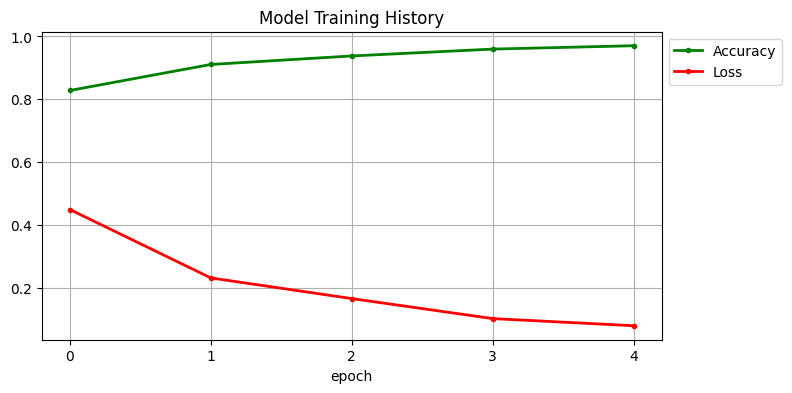

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import load_model
import numpy as np

In [ ]:
!unzip -o brain-tumor-mri-dataset.zip -d brain_tumor_dataset
!ls brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0726.jpg  
  inflating: brain_tumor_

In [ ]:
test_dir = 'brain_tumor_dataset'

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder

# Set test image folder path
test_dir = 'brain_tumor_dataset/Testing'
image_size = (224, 224)  # Update if your model uses a different input size

# Gather image paths and labels
test_paths = []
test_labels = []
for label in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label)
    for fname in os.listdir(label_path):
        if fname.endswith(('.jpg', '.png', '.jpeg')):
            test_paths.append(os.path.join(label_path, fname))
            test_labels.append(label)

# Load and preprocess images
def open_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size=image_size)
        img_array = img_to_array(img) / 255.0
        images.append(img_array)
    return np.array(images)

# Encode string labels to numbers
def encode_label(labels):
    le = LabelEncoder()
    return le.fit_transform(labels), le

# Run preprocessing
test_images = open_images(test_paths)
test_labels_encoded, label_encoder = encode_label(test_labels)


In [ ]:
# Set the correct image size
image_size = (128, 128)

# Load and preprocess images
test_images = open_images(test_paths)  # This will now resize images to 128x128

# Encode labels
test_labels_encoded, label_encoder = encode_label(test_labels)

# Predict using the trained model
test_predictions = model.predict(test_images)
predicted_classes = np.argmax(test_predictions, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(test_labels_encoded, predicted_classes, target_names=label_encoder.classes_))


41/41 ━━━━━━━━━━━━━━━━━━━━ 312s 8s/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.98      0.90      0.94       300
  meningioma       0.89      0.98      0.93       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.99      0.97      0.98       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



Confusion Matrix:
[[270  29   0   1]
 [  5 299   0   2]
 [  0   0 405   0]
 [  1   7   0 292]]


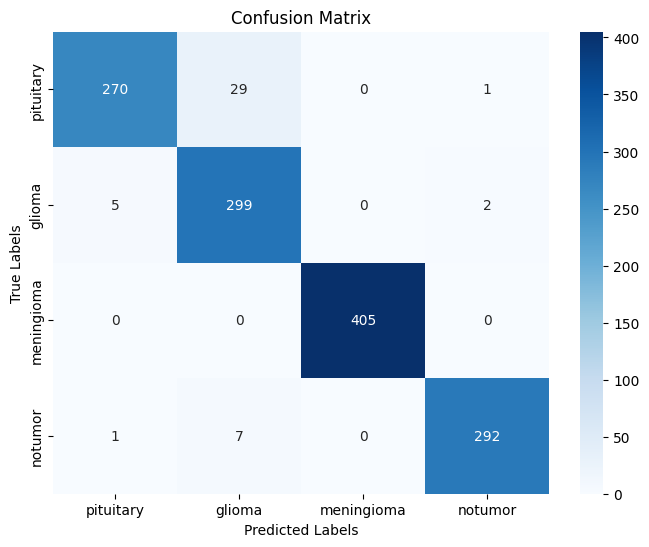

In [ ]:
# 3. Confusion Matrix
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis=1))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=os.listdir(train_dir), yticklabels=os.listdir(train_dir))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


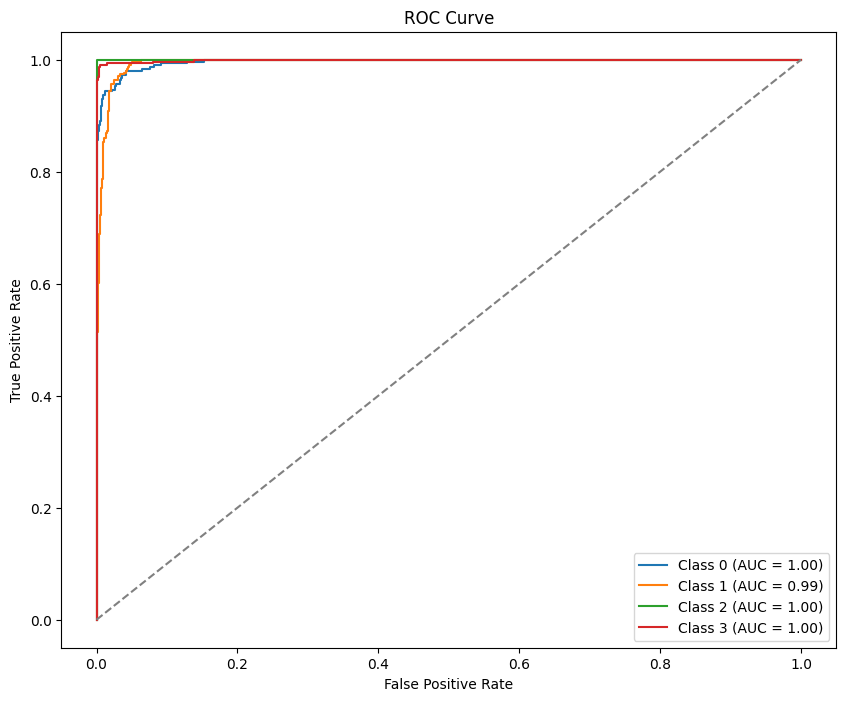

In [ ]:

# 4. ROC Curve and AUC
# Binarize the test labels and predictions for multi-class ROC
test_labels_bin = label_binarize(test_labels_encoded, classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bin = test_predictions  # The predicted probabilities for each class

# Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(os.listdir(train_dir))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(os.listdir(train_dir))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Saving the entire model
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model = load_model('model.h5')

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Class labels
class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma']

def detect_and_display(img_path, model, image_size=128):
    """
    Function to detect tumor and display results.
    If no tumor is detected, it displays "No Tumor".
    Otherwise, it shows the predicted tumor class and confidence.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'notumor':
            result = "No Tumor"
        else:
            result = f"Tumor: {class_labels[predicted_class_index]}"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))

# New Section